In [1]:
import numpy as np
from mpi4py import MPI
from dolfinx.mesh import create_rectangle, CellType
from pybandgap.set_structure import SetStructure, Material
from pybandgap.fem import global_matrixes
from pybandgap.bandgap import bandgap
from meshes.truss_like_mesh import truss_like_cross
from pybandgap.set_structure import SetStructure, Material, MeshUtils

# structure setup

In [2]:
a = 20e-3
nx = 20
ny = nx
msh = create_rectangle(MPI.COMM_WORLD, np.array([[-a/2,-a/2],[a/2,a/2]]), [nx, ny], CellType.quadrilateral)

In [3]:
aluminum = Material('aluminum', young_modulus=70e9, poisson_ratio=0.33, density=2.7e3)
tungsten = Material('tungsten', young_modulus=411e9, poisson_ratio=0.28, density=19.3e3)

In [4]:
structure = SetStructure(meshes = msh)
elements_IBZ, condition_IBZ= structure.find_irreducible_brillouin_zone()

In [ ]:
centers = MeshUtils.get_midpoints(msh)

condition_1 = centers[:,0]<= a/4
condition_2 = centers[:,1]<= a/4

condition = np.vstack((condition_IBZ, condition_1, condition_2))

tungsten_elements = np.where(np.all(condition, axis=0))[0]

In [6]:
material_elements = np.array([
    tungsten if i in tungsten_elements else aluminum
    for i in elements_IBZ])

In [7]:
structure.set_prop('materials', material_elements)

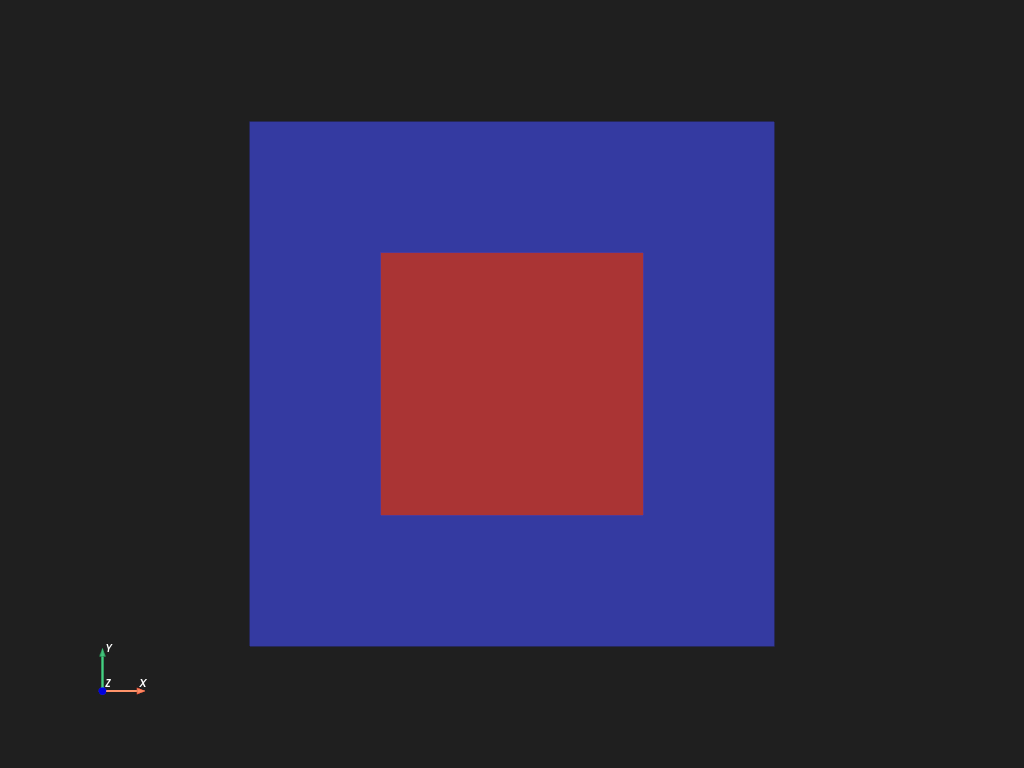

In [8]:
structure.show_structure()

In [9]:
M_global, K_global = global_matrixes(structure)

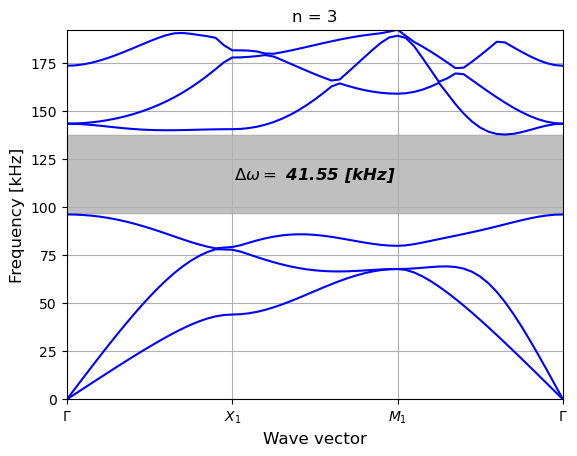

In [10]:
_ = bandgap(3, structure, M_global, K_global, N_eig = 6, plot= True, NINT=60, tol = 1e-10, max_it = 150)

# References
- Yi, G., Shin, Y. C., Yoon, H., Jo, S.-H., & Youn, B. D. (2019). Topology optimization for phononic band gap maximization considering a target driving frequency. JMST Advances. doi:10.1007/s42791-019-00019-y
